In [1]:
# 1_data_preparation.ipynb  
  
# 📦 Importation des bibliothèques  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pickle  
import warnings  
warnings.filterwarnings("ignore")  
  

In [3]:
# 📊 Chargement des données  
print("Chargement des données...")  
df = pd.read_csv('../data/raw/dataset.csv')

Chargement des données...


In [5]:
# 📋 Aperçu des données  
print("Aperçu des données:")  
print(f"Forme du dataset: {df.shape}")  
print("\nColonnes disponibles:")  
print(df.columns.tolist())  
print("\nPremières lignes:")  
display(df.head())  

Aperçu des données:
Forme du dataset: (5000, 34)

Colonnes disponibles:
['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id', 'Product Barcode', 'Product Company Type Source', 'Product Brand Source', 'Product Brand Normalised Source', 'Product Name Source', 'Match Rank', 'Match Score', 'Match Type', 'Retailer', 'Product Category', 'Product Brand', 'Product Name', 'Product Price', 'Sku', 'Upc', 'Product Url', 'Market', 'Product Description', 'Product Currency', 'Product Available Inventory', 'Product Image Url', 'Product Model Number', 'Product Tags', 'Product Contents', 'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key', 'Clicked', 'View_Time_Sec']

Premières lignes:


,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key,Clicked,View_Time_Sec
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a,0,0
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057,1,147
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af,0,0
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779,0,0
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da,1,177


In [7]:
# 🔍 Sélection des colonnes pertinentes  
df = df[['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',   
         'Clicked', 'View_Time_Sec', 'Product Name', 'Product Description',  
         'Product Tags', 'Product Category', 'Product Brand']]  
  
print("\nColonnes sélectionnées:")  
print(df.columns.tolist())  
  


Colonnes sélectionnées:
['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count', 'Clicked', 'View_Time_Sec', 'Product Name', 'Product Description', 'Product Tags', 'Product Category', 'Product Brand']


In [9]:
# 🧹 Nettoyage des données  
# Conversion des types  
df["Uniq Id"] = df["Uniq Id"].astype(str)  
df["Product Id"] = df["Product Id"].astype(str)  
df["Product Rating"] = pd.to_numeric(df["Product Rating"], errors="coerce")  

In [11]:
# Analyse des valeurs manquantes  
print("\n📊 Analyse des valeurs manquantes:")  
missing_values = df.isnull().sum()  
missing_percentage = (missing_values / len(df)) * 100  
missing_df = pd.DataFrame({  
    'Valeurs manquantes': missing_values,  
    'Pourcentage (%)': missing_percentage  
})  
display(missing_df) 


📊 Analyse des valeurs manquantes:


,Valeurs manquantes,Pourcentage (%)
Uniq Id,0,0.00
Product Id,0,0.00
Product Rating,2806,56.12
Product Reviews Count,1654,33.08
Clicked,0,0.00
View_Time_Sec,0,0.00
Product Name,0,0.00
Product Description,1127,22.54
Product Tags,0,0.00
Product Category,10,0.20


In [13]:
# Gestion des valeurs manquantes pour Product Rating  
print("\n🔍 Analyse de Product Rating:")  
total_lignes = len(df)  
valeurs_nan = df["Product Rating"].isna().sum()  
valeurs_zero = (df["Product Rating"] == 0).sum()  
total_problèmes = valeurs_nan + valeurs_zero  
pourcentage = total_problèmes / total_lignes * 100  
  
print(f"Nombre de valeurs NaN dans Product Rating : {valeurs_nan}")  
print(f"Nombre de valeurs = 0 dans Product Rating : {valeurs_zero}")  
print(f"Pourcentage de lignes problématiques : {pourcentage:.2f}%") 


🔍 Analyse de Product Rating:
Nombre de valeurs NaN dans Product Rating : 2806
Nombre de valeurs = 0 dans Product Rating : 0
Pourcentage de lignes problématiques : 56.12%


In [15]:
  
# Imputation des notes manquantes par la moyenne de la catégorie  
moyennes_par_cat = df.groupby('Product Category')['Product Rating'].mean().to_dict()  
moyenne_globale = df['Product Rating'].mean()  
  
def imputer_note(row):  
    if pd.isna(row['Product Rating']) or row['Product Rating'] == 0:  
        moyenne_cat = moyennes_par_cat.get(row['Product Category'])  
        return moyenne_cat if not pd.isna(moyenne_cat) else moyenne_globale  
    return row['Product Rating']  
  
df['Product Rating'] = df.apply(imputer_note, axis=1)  

In [17]:
# Remplissage des autres valeurs manquantes  
df['Product Description'] = df['Product Description'].fillna("")  
df['Product Brand'] = df['Product Brand'].fillna("Unknown")  
df['Product Category'] = df['Product Category'].fillna("Unknown")

In [19]:
  
# Gestion des valeurs manquantes pour Product Reviews Count  
print("\n🔍 Analyse de Product Reviews Count:")  
df['Product Reviews Count'] = pd.to_numeric(df['Product Reviews Count'], errors='coerce')  
manquantes = df['Product Reviews Count'].isna().sum()  
pourcentage = (manquantes / total_lignes) * 100  
print(f"Product Reviews Count : {manquantes} valeurs manquantes ({pourcentage:.2f}%)")  
  
moyenne = df['Product Reviews Count'].mean()  
df['Product Reviews Count'] = df['Product Reviews Count'].fillna(moyenne)  


🔍 Analyse de Product Reviews Count:
Product Reviews Count : 1654 valeurs manquantes (33.08%)


In [21]:
# Vérification des doublons  
print("\n🔍 Vérification des doublons:")  
doublons = df.duplicated().sum()  
print(f"Doublons trouvés : {doublons}")  
df.drop_duplicates(inplace=True)  


🔍 Vérification des doublons:
Doublons trouvés : 0


In [23]:
  
# 🔧 Création de fonctionnalités  
# Création d'une colonne de texte combinée pour le filtrage basé sur le contenu  
df['Full_Text'] = df['Product Description'] + " " + df['Product Tags']  
df['Full_Text'] = df['Full_Text'].str.lower()  
  
# Normalisation du temps de visionnage  
df['Norm_View_Time'] = df['View_Time_Sec'] / df['View_Time_Sec'].max()  
  
# Création de la colonne 'Rating' hybride  
df['Rating'] = (  
    0.5 * df['Product Rating'] +  
    0.3 * df['Clicked'] * 5 +  
    0.2 * df['Norm_View_Time'] * 5  
)  

In [25]:
  
# 📊 Statistiques descriptives après nettoyage  
print("\n📊 Statistiques descriptives après nettoyage:")  
display(df.describe())


📊 Statistiques descriptives après nettoyage:


,Product Rating,Product Reviews Count,Clicked,View_Time_Sec,Norm_View_Time,Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.311178,571.035565,0.694800,64.052600,0.355848,3.553637
std,0.587811,2033.317010,0.460538,60.194755,0.334415,1.003667
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000
25%,4.106667,7.000000,0.000000,0.000000,0.000000,2.354545
50%,4.400000,167.000000,1.000000,52.000000,0.288889,3.957435
75%,4.600000,571.035565,1.000000,118.000000,0.655556,4.344444
max,5.000000,29242.000000,1.000000,180.000000,1.000000,5.000000


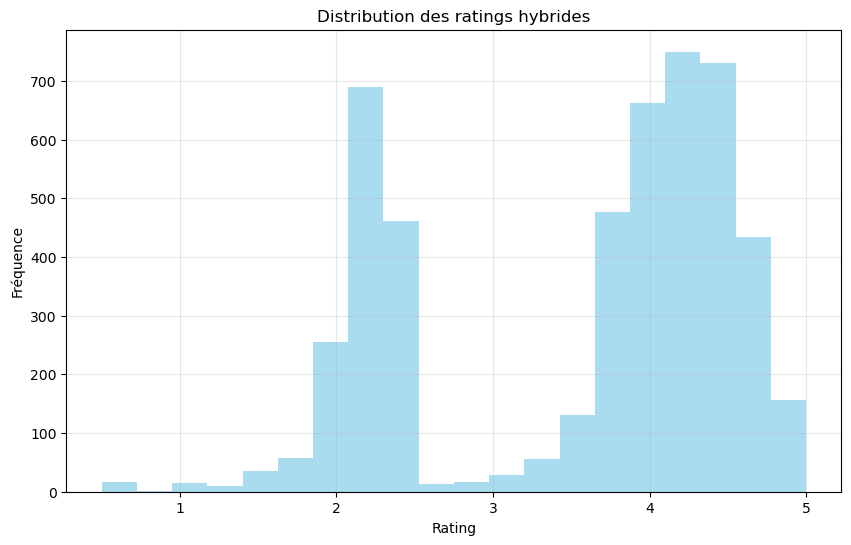

In [27]:
  
# 📈 Visualisation de la distribution des ratings  
plt.figure(figsize=(10, 6))  
plt.hist(df['Rating'], bins=20, alpha=0.7, color='skyblue')  
plt.title('Distribution des ratings hybrides')  
plt.xlabel('Rating')  
plt.ylabel('Fréquence')  
plt.grid(alpha=0.3)  
plt.show()  

In [29]:
 
# ✅ Vérification finale  
print("\n✅ Nettoyage terminé")  
print(f"Forme finale : {df.shape}")  
print("Valeurs manquantes restantes :")  
display(df.isnull().sum())  


✅ Nettoyage terminé
Forme finale : (5000, 14)
Valeurs manquantes restantes :


Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Clicked                  0
View_Time_Sec            0
Product Name             0
Product Description      0
Product Tags             0
Product Category         0
Product Brand            0
Full_Text                0
Norm_View_Time           0
Rating                   0
dtype: int64

In [31]:
# 💾 Sauvegarde du DataFrame nettoyé  
print("\n💾 Sauvegarde du DataFrame nettoyé...")  
df.to_csv('../data/processed/clean_dataset.csv', index=False)  
print("DataFrame sauvegardé dans '../data/processed/clean_dataset.csv'")



💾 Sauvegarde du DataFrame nettoyé...
DataFrame sauvegardé dans '../data/processed/clean_dataset.csv'


In [33]:
# Sauvegarde en format pickle pour préserver les types de données  
with open('../data/processed/clean_dataset.pkl', 'wb') as f:  
    pickle.dump(df, f)  
print("DataFrame sauvegardé en format pickle dans '../data/processed/clean_dataset.pkl'")  
  
print("\n✅ Préparation des données terminée!")

DataFrame sauvegardé en format pickle dans '../data/processed/clean_dataset.pkl'

✅ Préparation des données terminée!
